In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Cleaned_Data.csv")

# df_text = pd.read_csv("Clean_Test.csv")

In [3]:
vectorizer = TfidfVectorizer()

In [4]:
X = df["Clean_text"]
y = df["target"]
# x = df_text["Clean_text"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10) #0.2

In [5]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
# X_train_tfidf = vectorizer.fit_transform(X)
# X_test_tfidf = vectorizer.transform(x)

In [6]:
svm = SVC(kernel='linear') 
svm.fit(X_train_tfidf,y_train)

SVC(kernel='linear')

In [14]:
y_pred = svm.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy on training data")
print(svm.score(X_train_tfidf,y_train))

print("Accuracy on testing data")
print(svm.score(X_test_tfidf,y_test))

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Accuracy on training data
0.8945902360357719
Accuracy on testing data
0.8153034300791556
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       427
           1       0.83      0.73      0.77       331

    accuracy                           0.82       758
   macro avg       0.82      0.81      0.81       758
weighted avg       0.82      0.82      0.81       758



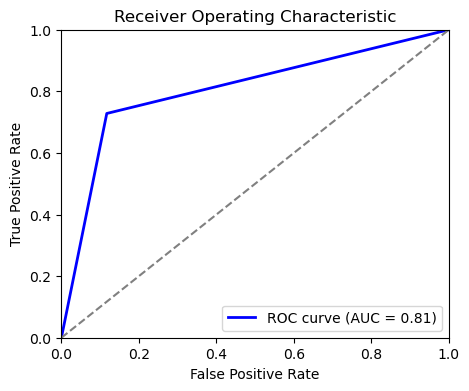

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()